In [1]:
import os
import matplotlib.pyplot as plt

from model import (
    SocietyConstantsEnergyPrices,
    GovernmentBuildChargingStation,
    GovernmentCloseChargingStation,
    CV,
    EV,
    PHEV,
)
from model.utils import get_trajectories, common_params, plot_intervals

GOV to do!


In [2]:
plt.style.use("dark_background")
plt.rc("grid", alpha=0.3)

In [3]:
MC = 100
T = 90
N = common_params["kwargs"]["population"]
common_params["kwargs"]["government"] = GovernmentCloseChargingStation()

In [4]:
common_params

{'T': 100,
 'kwargs': {'government': <model.Government.GovernmentCloseChargingStation at 0x7f8c50de63d0>,
  'population': 700,
  'energy_price': 600,
  'fuel_price': 6,
  'nerby_radius': 10,
  'city_size': (200, 200),
  'alpha': 0.01,
  'corporation_margin': 0.2,
  'corporation_technological_progress': 0.0004,
  'initial_public_chargers': 100,
  'initial_time': (2015, 1),
  'car_price_noise': <function model.utils.common_params.<lambda>()>}}

In [5]:
[CVs, EVs, PHEVs, year] = get_trajectories(
    SocietyConstantsEnergyPrices, common_params["kwargs"], T, MC, 4
)

Text(0.5, 0.98, 'constatnt prices, government build chargers stations')

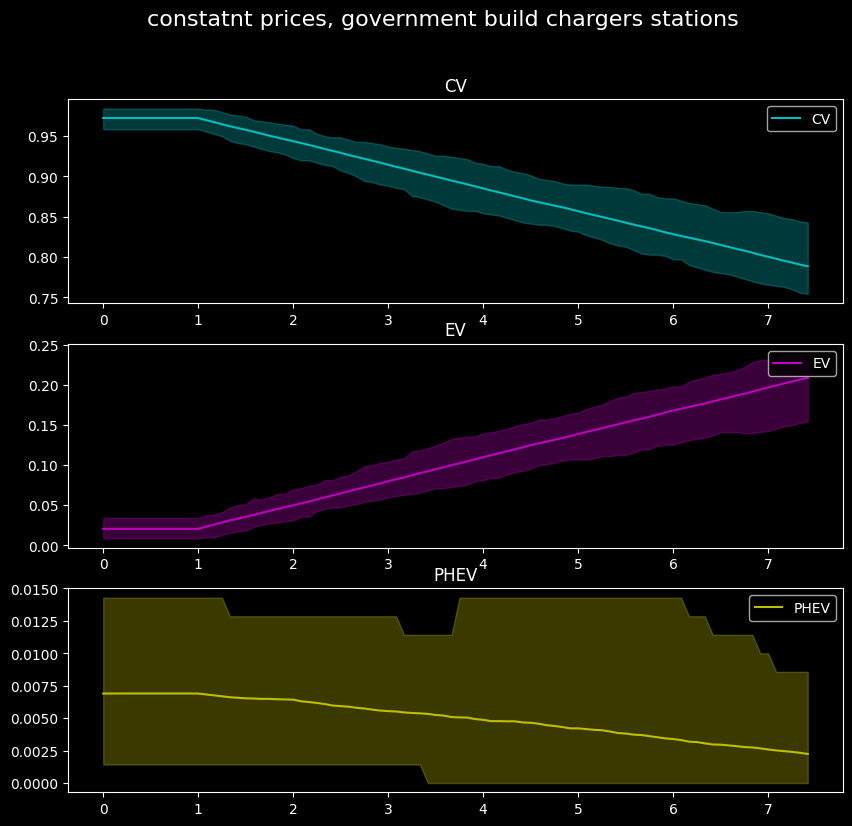

In [6]:
fig, axs = plt.subplots(nrows=3, figsize=(10, 9))

plot_intervals(
    year / 12,
    [trajectory / N for trajectory in CVs],
    ax=axs[0],
    color="c",
    label="CV",
    alpha=0.3,
)
plot_intervals(
    year / 12,
    [trajectory / N for trajectory in EVs],
    ax=axs[1],
    color="m",
    label="EV",
    alpha=0.3,
)
plot_intervals(
    year / 12,
    [trajectory / N for trajectory in PHEVs],
    ax=axs[2],
    color="y",
    label="PHEV",
    alpha=0.3,
)


axs[0].legend()
axs[1].legend()
axs[2].legend()

axs[0].set_title("CV")
axs[1].set_title("EV")
axs[2].set_title("PHEV")

fig.suptitle("constatnt prices, government build chargers stations", fontsize=16)

Text(0.5, 0.98, 'Distributoins of increase cars during model')

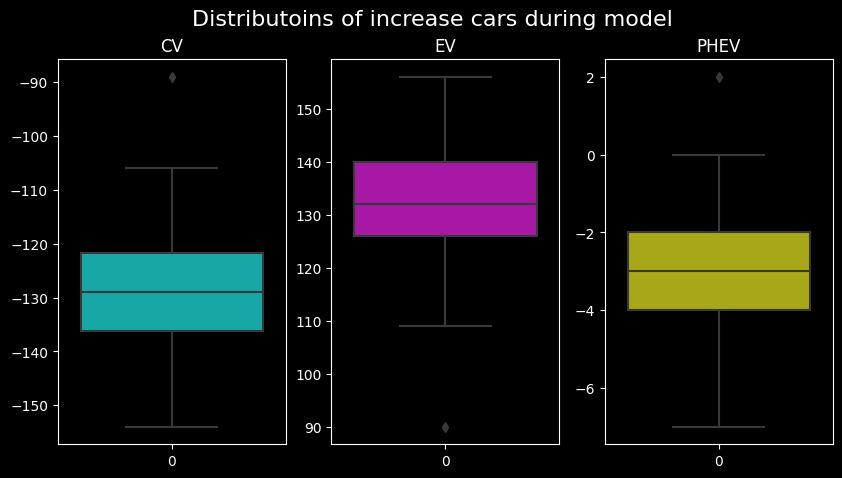

In [7]:
fig, axs = plt.subplots(ncols=3, figsize=(10, 5))
import seaborn as sns

sns.boxplot(
    [line.loc[len(line) - 1] - line.loc[0] for line in CVs], ax=axs[0], color="c"
)
axs[0].set_title("CV")

sns.boxplot(
    [line.loc[len(line) - 1] - line.loc[0] for line in EVs], ax=axs[1], color="m"
)
axs[1].set_title("EV")

sns.boxplot(
    [line.loc[len(line) - 1] - line.loc[0] for line in PHEVs], ax=axs[2], color="y"
)
axs[2].set_title("PHEV")

fig.suptitle("Distributoins of increase cars during model", fontsize=16)